# Practice for Tensorflow 2

## C2W1

In [22]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [23]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-11-14 13:59:32--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.40.44.112
Connecting to download.microsoft.com (download.microsoft.com)|23.40.44.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: `/tmp/cats-and-dogs.zip'

/tmp/cats-and-dogs. 100%[===================>] 786.68M  39.8MB/s    in 19s     

2021-11-14 13:59:51 (41.7 MB/s) - `/tmp/cats-and-dogs.zip' saved [824894548/824894548]



In [24]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [25]:
# 데이터 넣어줄 폴더 생성
try:
  os.mkdir('/tmp/cats-v-dogs')
  os.mkdir('/tmp/cats-v-dogs/training')
  os.mkdir('/tmp/cats-v-dogs/testing')
  os.mkdir('/tmp/cats-v-dogs/training/cats')
  os.mkdir('/tmp/cats-v-dogs/training/dogs')
  os.mkdir('/tmp/cats-v-dogs/testing/cats')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs')

except OSError:
  pass

In [26]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  """
    source : directory containing files
    training : directory that a portion of the files will be copied to
    testing : directory that a portion of the files will be copied to 
    split_size : size determine the portion
    -> if split_size = 0.9, 90% of the images in PetImages/Cat will be copied to the training dir
    and 10% of the images will be copied to the testing dir
  """

  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring")
  
  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)
  
  for filename in testing_set:
    this_file = SOURCE + filename
    destination = TESTING + filename
    copyfile(this_file, destination)
  

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
#source dir에서 꺼내서 training, testing에다가 splitsize로 랜덤하게 뽑아서 분리한다.
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)



666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [27]:

print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

12492
12482
3385
3369


In [48]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [9]:
!pip install pillow

In [30]:
import PIL

In [11]:
CAT_SOURCE_DIR = "/tmp/cats-v-dogs/training/cats/5383.jpg"
files = []
for filename in os.listdir(CAT_SOURCE_DIR):
  file = CAT_SOURCE_DIR + filename
  if os.path.getsize(file) > 0:
    files.append(filename)
  else:
    print(filename + " is zero length, so ignoring")

In [12]:
files

['9733.jpg',
 '63.jpg',
 '6400.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '10321.jpg',
 '2666.jpg',
 '5109.jpg',
 '11981.jpg',
 '10447.jpg',
 '2100.jpg',
 '11759.jpg',
 '4571.jpg',
 '7078.jpg',
 '12250.jpg',
 '1409.jpg',
 '9055.jpg',
 '6366.jpg',
 '12244.jpg',
 '189.jpg',
 '9041.jpg',
 '6372.jpg',
 '11995.jpg',
 '10453.jpg',
 '2114.jpg',
 '4565.jpg',
 '4203.jpg',
 '10335.jpg',
 '2672.jpg',
 '9727.jpg',
 '6414.jpg',
 '77.jpg',
 '8439.jpg',
 '837.jpg',
 '2882.jpg',
 '3544.jpg',
 '11003.jpg',
 '5135.jpg',
 '1353.jpg',
 '7722.jpg',
 '8411.jpg',
 '7044.jpg',
 '8377.jpg',
 '1435.jpg',
 '9069.jpg',
 '5653.jpg',
 '3222.jpg',
 '11765.jpg',
 '5647.jpg',
 '2128.jpg',
 '3236.jpg',
 '11771.jpg',
 '4559.jpg',
 '7050.jpg',
 '8363.jpg',
 '12278.jpg',
 '1421.jpg',
 '6428.jpg',
 '1347.jpg',
 '7736.jpg',
 '8405.jpg',
 '2896.jpg',
 '3550.jpg',
 '11017.jpg',
 '10309.jpg',
 '5121.jpg',
 '9928.jpg',
 '638.jpg',
 '7905.jpg',
 '9096.jpg',
 '8388.jpg',
 '12293.jpg',
 '5874.jpg',
 '11942.jpg',
 '10484.jpg',
 '

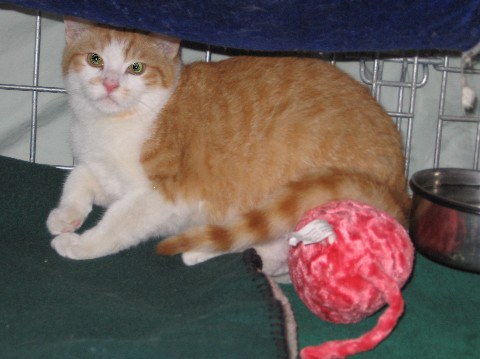

In [13]:
PIL.Image.open(CAT_SOURCE_DIR + '5383.jpg')

In [15]:
import numpy as np
image = np.array(PIL.Image.open(CAT_SOURCE_DIR + '5383.jpg'))

In [16]:
#위에서 input_shape은 사진들 중 가장 작은 사진의 shape에 맞춘 정사각형으로 해야 한다고 한다.
image.shape

(359, 480, 3)

In [47]:
# training_dir 안에 2개의 폴더가 있기 때문에 그 폴더가 labeling의 기준이 되는 것임
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150,150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150,150))


Found 24972 images belonging to 2 classes.
Found 6753 images belonging to 2 classes.


In [50]:
history = model.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/50


2021-11-14 14:13:01.843459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 0.6534 - accuracy: 0.6450

2021-11-14 14:13:40.395447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 49s 193ms/step - loss: 0.6534 - accuracy: 0.6450 - val_loss: 0.5410 - val_accuracy: 0.7172
Epoch 2/50
250/250 [==============================] - 52s 208ms/step - loss: 0.4992 - accuracy: 0.7573 - val_loss: 0.4032 - val_accuracy: 0.8182
Epoch 3/50
250/250 [==============================] - 52s 207ms/step - loss: 0.4176 - accuracy: 0.8055 - val_loss: 0.3482 - val_accuracy: 0.8451
Epoch 4/50
250/250 [==============================] - 52s 208ms/step - loss: 0.3556 - accuracy: 0.8435 - val_loss: 0.2825 - val_accuracy: 0.8820
Epoch 5/50
250/250 [==============================] - 53s 210ms/step - loss: 0.2841 - accuracy: 0.8778 - val_loss: 0.2412 - val_accuracy: 0.8960
Epoch 6/50
250/250 [==============================] - 52s 209ms/step - loss: 0.2135 - accuracy: 0.9125 - val_loss: 0.1544 - val_accuracy: 0.9483
Epoch 7/50
250/250 [==============================] - 53s 210ms/step - loss: 0.1452 - accuracy: 0.9429 - val_loss: 0.0655 - val_accuracy: 0.9

In [51]:
model.save('c2w1.h5')

<Figure size 432x288 with 0 Axes>

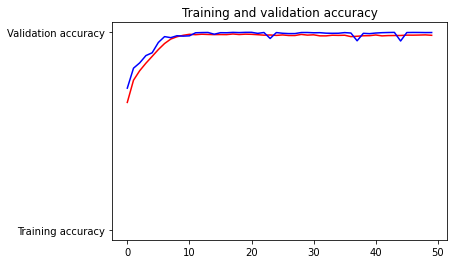

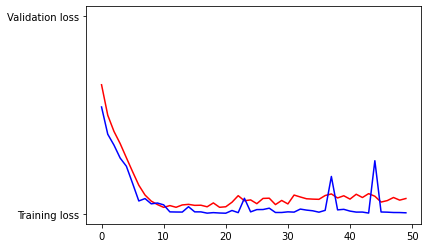

<Figure size 432x288 with 0 Axes>

In [54]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Retrieve list of result 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#get number of epochs
epochs = range(len(acc))

#plot acc
plt.plot(epochs, acc, 'r', "Training accuracy")
plt.plot(epochs, val_acc, 'b', "Validation accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#plot loss
plt.plot(epochs, loss, 'r', "Training loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.figure()

In [68]:
# using model for specific picture
import numpy as np
from keras.preprocessing import image

paths = ['/Users/jinwooahn/Documents/dev_folder/2021_2nd_semester/tensorflow_certificate/C2/W1/dante.jpg',
        '/Users/jinwooahn/Documents/dev_folder/2021_2nd_semester/tensorflow_certificate/C2/W1/danchu.jpg']

for path in paths:
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print("Is a cat")
    else:
        print("Is a dog")

[1.]
Is a cat
[1.]
Is a cat


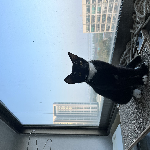

In [69]:
img